In [1]:
!pip install requests
!pip install beautifulsoup4

In [2]:
import numpy as np
import pandas as pd
import requests
import bs4
import lxml.etree as xml
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys
#!{sys.executable} -m pip install selenium
url = "https://www.worldometers.info/world-population/population-by-country/"
requests.get(url)
requests.get(url, {}).text
soup = bs4.BeautifulSoup(requests.get(url,{}).text, "lxml")
soup.head.title

<title>Population by Country (2020) - Worldometer</title>

In [3]:
r = requests.get(url)
html_doc = r.text
soup = bs4.BeautifulSoup(html_doc, features='html.parser')

table = soup.find('table', attrs={'id':'example2'})

list1 = []

for tr in table.find_all('tr'):
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    list1.append(row)

        
df=pd.DataFrame(list1)    
df.columns =  df.iloc[1]
#starting from this point,it's just how you want to clean and slice the data
df = df.iloc[1:]  #check the data to see if you want to only read these
df.dropna(axis='columns', how='all', inplace=True)
df.drop(df.columns[[0]], axis = 1, inplace=True) 
df.columns = ['Country (or dependency)', 'Population (2020)', 'Yearly Change', 'Net Change', 
                'Density (P/Km^2)', 'Land Area (Km^2)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop%', 'World Share'] 
df.replace(',','', regex=True, inplace=True)
df['Population (2020)'].apply(pd.to_numeric,errors='coerce')
df['Net Change'].apply(pd.to_numeric,errors='coerce')
df['Density (P/Km^2)'].apply(pd.to_numeric,errors='coerce')
df['Land Area (Km^2)'].apply(pd.to_numeric,errors='coerce')
df['Migrants (net)'].apply(pd.to_numeric,errors='coerce')
df['Fert. Rate'].apply(pd.to_numeric,errors='coerce')
df['Med. Age'].apply(pd.to_numeric,errors='coerce')
df

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km^2),Land Area (Km^2),Migrants (net),Fert. Rate,Med. Age,Urban Pop%,World Share
1,China,1439323776,0.39 %,5540090,153,9388211,-348399,1.7,38,61 %,18.47 %
2,India,1380004385,0.99 %,13586631,464,2973190,-532687,2.2,28,35 %,17.70 %
3,United States,331002651,0.59 %,1937734,36,9147420,954806,1.8,38,83 %,4.25 %
4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955,2.3,30,56 %,3.51 %
5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
231,Montserrat,4992,0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
232,Falkland Islands,3480,3.05 %,103,0,12170,,N.A.,N.A.,66 %,0.00 %
233,Niue,1626,0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
234,Tokelau,1357,1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
df1 = df.loc[[1,2,3,11,20]]
df1

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km^2),Land Area (Km^2),Migrants (net),Fert. Rate,Med. Age,Urban Pop%,World Share
1,China,1439323776,0.39 %,5540090,153,9388211,-348399,1.7,38,61 %,18.47 %
2,India,1380004385,0.99 %,13586631,464,2973190,-532687,2.2,28,35 %,17.70 %
3,United States,331002651,0.59 %,1937734,36,9147420,954806,1.8,38,83 %,4.25 %
11,Japan,126476461,-0.30 %,-383840,347,364555,71560,1.4,48,92 %,1.62 %
20,Thailand,69799978,0.25 %,174396,137,510890,19444,1.5,40,51 %,0.90 %


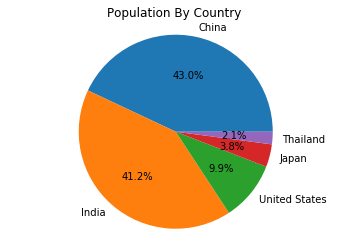

In [5]:
Population = df1['Population (2020)']
Country = df1['Country (or dependency)']
plt.pie(Population, labels=Country, autopct='%1.1f%%')
plt.title('Population By Country')
plt.axis('equal')
plt.show()